https://github.com/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb
https://colab.research.google.com/github/ageron/handson-ml2/blob/master/02_end_to_end_machine_learning_project.ipynb#scrollTo=E-hlmIU5tN3P


# <center>Lab 2</center>
# <center>Basics of Data Processing</center>


## Setup

In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

In [2]:
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

In [3]:
# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd
import urllib.request

In [4]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Get the data

With this code, we download and store the tgz file and extract it on the same location of the notebook and sub folders "datasets/employees/"

In [5]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/Darcinn/F21DL/main/"
EMPLOYEES_PATH = os.path.join("datasets", "employees")
EMPLOYEES_URL = DOWNLOAD_ROOT + "datasets/employees/employees.tar.gz"

def fetch_employees_data(employees_url=EMPLOYEES_URL, employees_path=EMPLOYEES_PATH):
    os.makedirs(employees_path, exist_ok=True)
    tgz_path = os.path.join(employees_path, "employees.tar.gz")
    urllib.request.urlretrieve(employees_url, tgz_path)
    employees_tgz = tarfile.open(tgz_path)
    employees_tgz.extractall(path=employees_path)
    employees_tgz.close()

In [6]:
fetch_employees_data()
# calling the function fetch_employees_data, (defined above) creates a datasets/employees directory in your workspace, downloads employees.tgz,
# downloads employees.tgz file and extracts the employees.csv file from it in this directory 

`load_employees_data` function loads the `employees.csv` into a panda `dataframe`

In [7]:
def load_employees_data(employees_path=EMPLOYEES_PATH):
    csv_path = os.path.join(employees_path, "employees.csv")
    return pd.read_csv(csv_path)

In [8]:
employees = load_employees_data() # "employees" is a pandas DataFrame object containing all the data
employees.head() # Display the top five rows of the DataFrame


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


<u>Q1 How many attribuites in the data set?</u>
The dataset contains 35 attributes

<u>Desribe the attribuites.</u>
<br>Age - Integer representing the age of the employee
<br>Attrition - Boolean representing if attrition has occured or not
<br>BusinessTravel - String representing how much the employee travels for businesss
<br>Daily Rate - Integer representing the employees daily salary
<br>Department - String representing which department the employee belongs to
<br>DistanceFromHome - Integer representing how far the employee lives from work
<br>Education - Integer representing the employees level of Education (1 'Below College', 2 'College', 3 'Bachelor', 4 'Master', 5 'Doctor')
<br>Education Field - String representing their academic focus
<br>EmployeeCount - N/A
<br>EmployeeNumber - Integer displaying the employees ID number
<br>EnvironmentSatisfaction - Integer value denoting the employees satisfaction with their working environment (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>Gender - String denoting the employees gender
<br>HourlyRate - Integer represending the employees hourly wage
<br>JobInvolvment - Integer stating the employees level of involvment with their job (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>JobLevel - Integer denoting their level of employment
<br>JobRole - String detailing their role within the company
<br>JobSatisfaction - Integer expressing their satisafaction with their employment (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>MaritalStatus - String stating the employees marital status
<br>MonthlyIncome - Integer stating the employees monthly income
<br>MonthlyRate - Unsure
<br>NumCompaniesWorked - Integer stating how many companies the employee has worked at
<br>Over18 - Boolean stating whether the employy is over 18 years old
<br>OverTime - Integer stating how much overtime has been worked
<br>PercentSalaryHike - Integer stating what % their salary has increased by
<br>PerformanceRating - Integer detailing the rating of the performance by their employer (1 'Low', 2 'Good', 3 'Excellent', 4 'Outstanding')
<br>RelationshipSatisfaction - Integer expressing their satisafaction with their current relationship (1 'Low', 2 'Medium', 3 'High', 4 'Very High')
<br>StandardHours - Integer detailing their contracted working hours
<br>StockOptionLevel - Integer detailing the stock options available to them
<br>TotalWorkingYears - Integer stating how many years they have been working
<br>TrainingTimes - Integer detailing how many training sessions they have attended
<br>WorkLifeBalance - Integer detailing the current work/life balance (1 'Bad', 2 'Good', 3 'Better', 4 'Best')
<br>YearsAtCompany - Integer stating how many years they have been employed with their current company
<br>YearsInCurrentRole - Integer stating how many years they have held their current position for
<br>YearsSinceLastPromotion - Integer stating how many years it has been since their lasp promotion
<br>YearsWithCurrManager - Integer stating how many years they have worked with their current manager

Each row represents the information gathered from one district of the California Housing Data Set:  https://www.kaggle.com/harrywang/employees

In [9]:
#This method prints information about a DataFrame including the dtype and columns, non-null values and memory usage.
employees.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

<u>Q2 Can you tell if there are any missing values? If yes, which attribuites contain missing values?</u>

There are no values that are missing or null. 

In [10]:
employees["Department"].value_counts() # Obviously ocean_proximity is a categorical attribuite
# Q3 What does the value_count() method display?

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [11]:
#This method shows a statistical summary of the numerical attributes 
employees.describe() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640).

The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall.

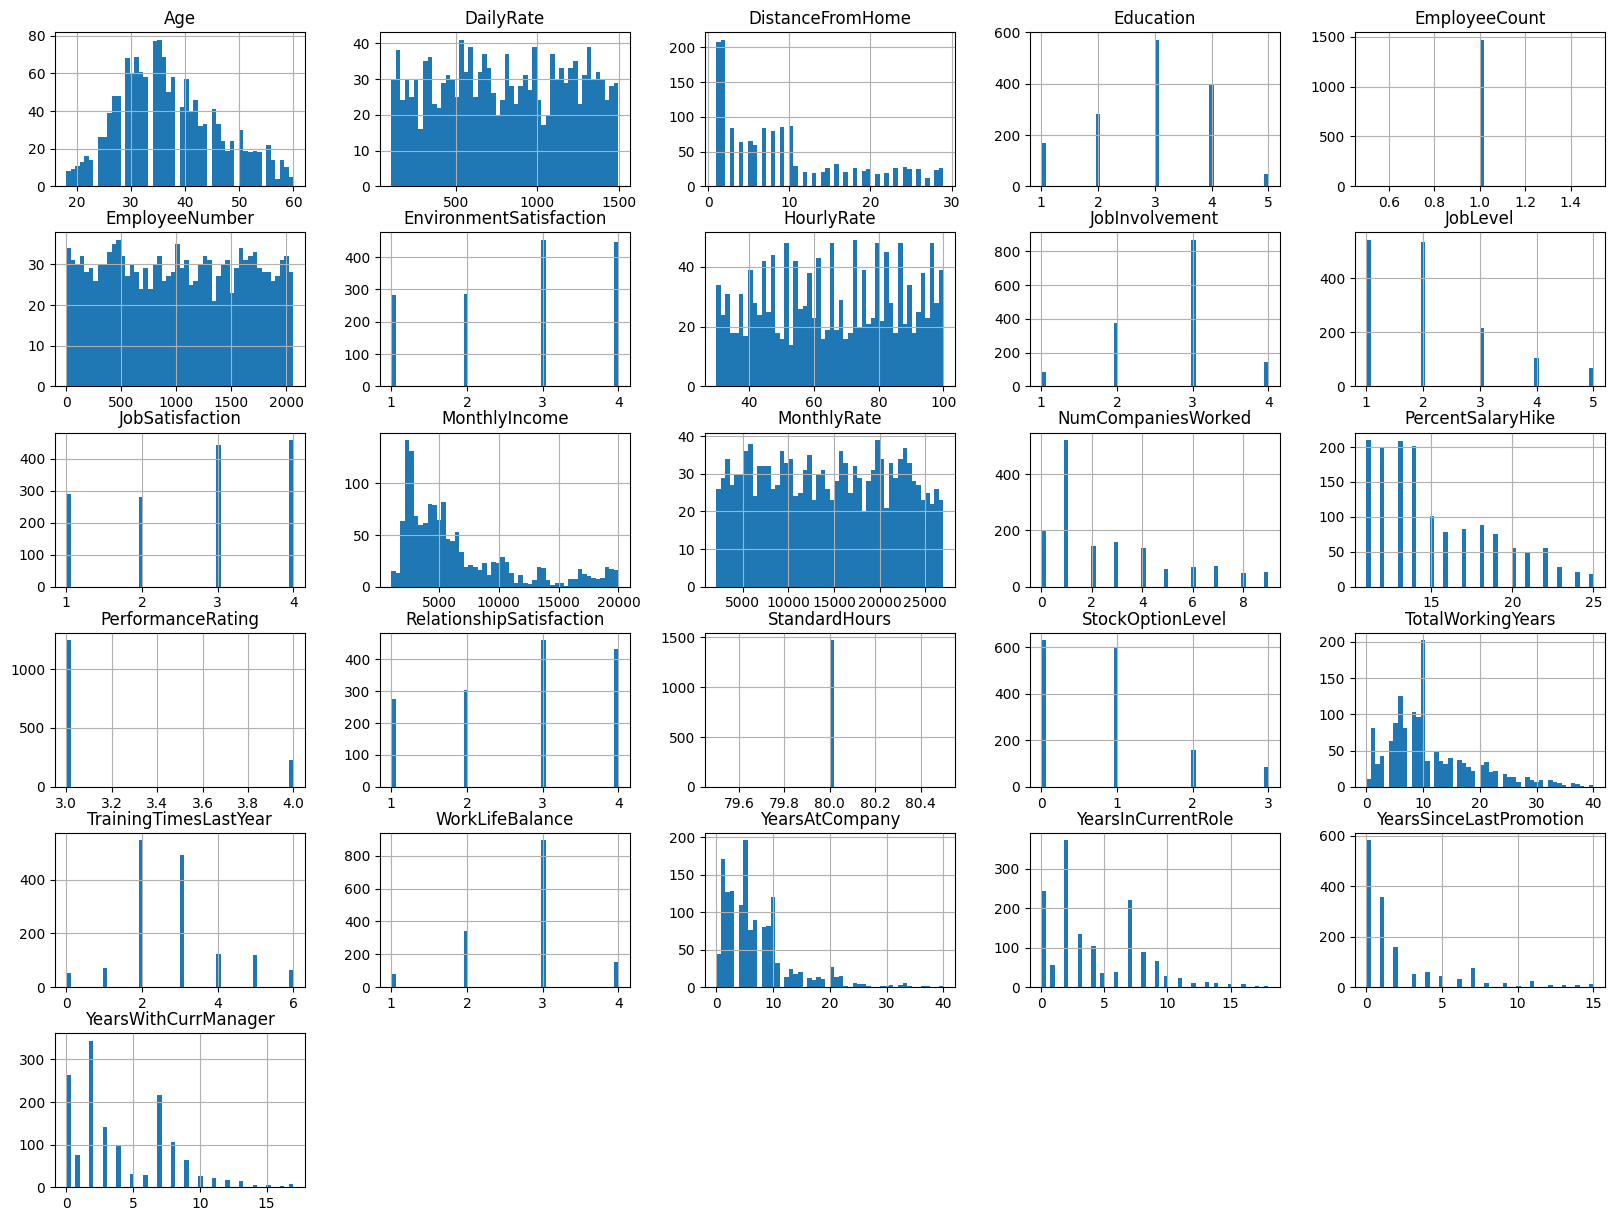

In [12]:
#To plot a histogram for each numerical attribute
employees.hist(bins=50, figsize=(20,15))
plt.show()


<u>Q4 List down the main observations you noted from the statistical summary and the histogram</u>

# Visualizing Geographical Data

<AxesSubplot: xlabel='JobLevel', ylabel='TotalWorkingYears'>

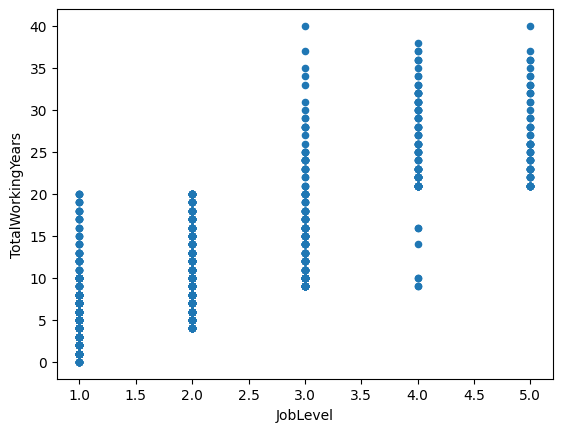

In [13]:
# Q5 Now you will plot 3 different variations of the data, which one is more indicative and why?
employees.plot(kind="scatter", x="JobLevel", y="TotalWorkingYears")


<AxesSubplot: xlabel='YearsAtCompany', ylabel='YearsSinceLastPromotion'>

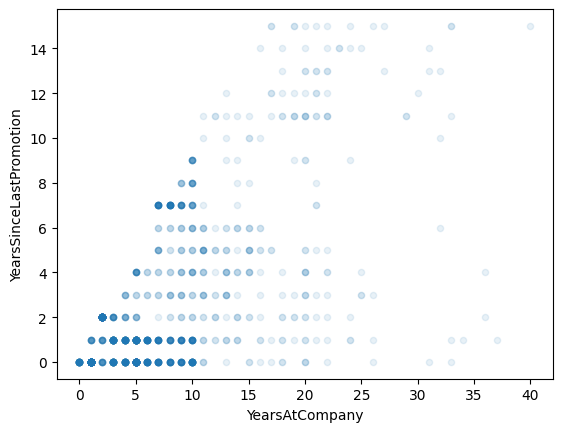

In [14]:
employees.plot(kind="scatter", x="YearsAtCompany", y="YearsSinceLastPromotion", alpha=0.1)

<AxesSubplot: xlabel='Age', ylabel='JobLevel'>

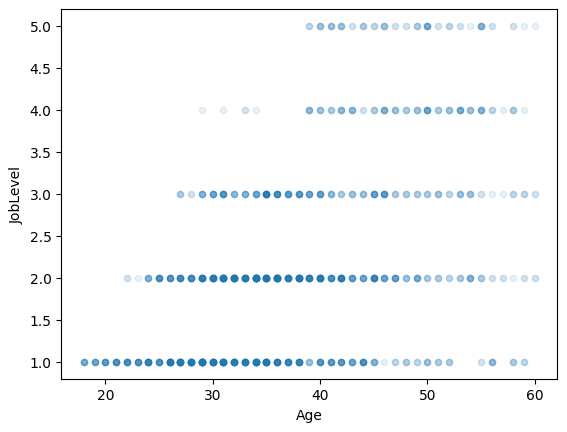

In [15]:
employees.plot(kind="scatter", x="Age", y="JobLevel", alpha=0.1)

In [16]:
# Now we will look at the correlation of all the attributes with the expected class attribute (median-house-value)
corr_matrix = employees.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes

C:\Users\Mikyb\AppData\Local\Temp\ipykernel_33240\1598564889.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = employees.corr() # computes the standard correlation coefficient (Pearson’s r) between every pair of attributes


In [17]:
corr_matrix["Age"].sort_values(ascending=False)
# Q6 Which are the most correlated attributes with the output variable(i.e.Age)?
# Does that make sense? 

Age                         1.000000
TotalWorkingYears           0.680381
JobLevel                    0.509604
MonthlyIncome               0.497855
YearsAtCompany              0.311309
NumCompaniesWorked          0.299635
YearsSinceLastPromotion     0.216513
YearsInCurrentRole          0.212901
Education                   0.208034
YearsWithCurrManager        0.202089
RelationshipSatisfaction    0.053535
StockOptionLevel            0.037510
JobInvolvement              0.029820
MonthlyRate                 0.028051
HourlyRate                  0.024287
DailyRate                   0.010661
EnvironmentSatisfaction     0.010146
PercentSalaryHike           0.003634
PerformanceRating           0.001904
DistanceFromHome           -0.001686
JobSatisfaction            -0.004892
EmployeeNumber             -0.010145
TrainingTimesLastYear      -0.019621
WorkLifeBalance            -0.021490
EmployeeCount                    NaN
StandardHours                    NaN
Name: Age, dtype: float64

<u>Q6 Which are the most correlated attributes with the output variable(i.e.Age)?</u>

The most correlated attributes in regards to age appear to be Total Working Years, Job Level and Monthly Income.


<u>Does that make sense?</u>

This outcome is exactly what is to be expected as an older employee will generally mean more years of expeerience therefore a higher positoon achieved resulting in a higher monthly salary

array([[<AxesSubplot: xlabel='Age', ylabel='Age'>,
        <AxesSubplot: xlabel='TotalWorkingYears', ylabel='Age'>,
        <AxesSubplot: xlabel='JobLevel', ylabel='Age'>,
        <AxesSubplot: xlabel='MonthlyIncome', ylabel='Age'>],
       [<AxesSubplot: xlabel='Age', ylabel='TotalWorkingYears'>,
        <AxesSubplot: xlabel='TotalWorkingYears', ylabel='TotalWorkingYears'>,
        <AxesSubplot: xlabel='JobLevel', ylabel='TotalWorkingYears'>,
        <AxesSubplot: xlabel='MonthlyIncome', ylabel='TotalWorkingYears'>],
       [<AxesSubplot: xlabel='Age', ylabel='JobLevel'>,
        <AxesSubplot: xlabel='TotalWorkingYears', ylabel='JobLevel'>,
        <AxesSubplot: xlabel='JobLevel', ylabel='JobLevel'>,
        <AxesSubplot: xlabel='MonthlyIncome', ylabel='JobLevel'>],
       [<AxesSubplot: xlabel='Age', ylabel='MonthlyIncome'>,
        <AxesSubplot: xlabel='TotalWorkingYears', ylabel='MonthlyIncome'>,
        <AxesSubplot: xlabel='JobLevel', ylabel='MonthlyIncome'>,
        <AxesSubplot

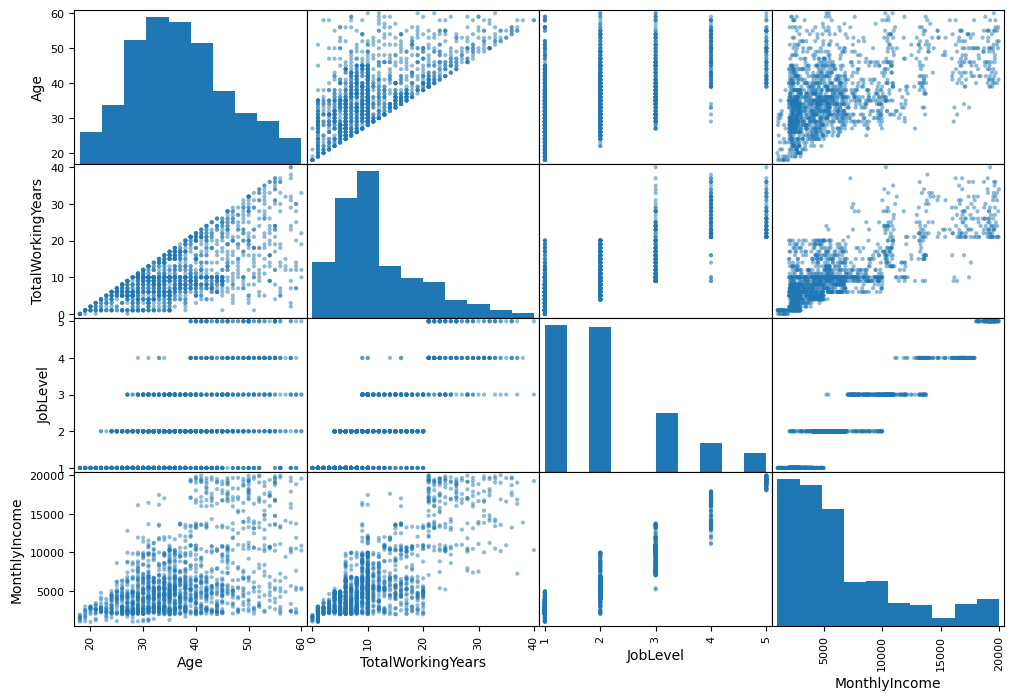

In [18]:
from pandas.plotting import scatter_matrix

attributes = ["Age", "TotalWorkingYears", "JobLevel",
              "MonthlyIncome"]
scatter_matrix(employees[attributes], figsize=(12, 8))
# Another way to check for correlation between attributes is to use the pandas scatter_matrix() function above
# Here we choose to plot 4 promising  numerical attributes against each other


(16.0, 65.0, 0.0, 20000.0)

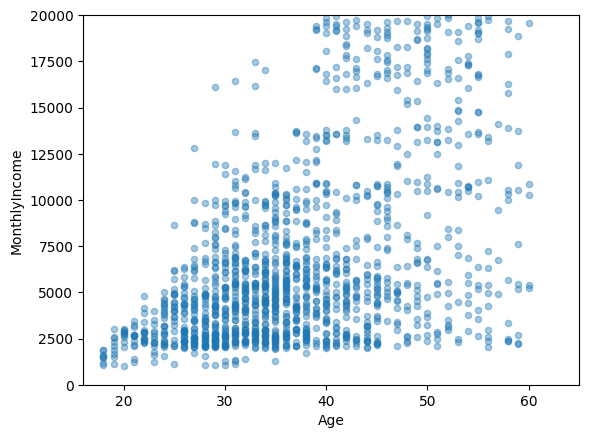

In [19]:
# let’s zoom in on the correlation scatterplot "monthly income & age,"
employees.plot(kind="scatter", x="Age", y="MonthlyIncome",
             alpha=0.4)
plt.axis([16, 65, 0, 20000])
#Q7 Describe the plot below. What does this indicate? Do you have an explanation for the solid line?

In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
job_level = pd.DataFrame(encoder.fit_transform(employees[["JobLevel"]]).toarray(),
                         columns=encoder.get_feature_names_out())
encoded_df = pd.concat([employees, job_level], axis=1).drop("JobLevel", axis=1)

In [21]:
other_cols = [c for c in encoded_df.columns if not c.startswith("JobLevel_")]
dfs = []
for col in encoder.get_feature_names_out():
    df = encoded_df[[col, *other_cols]]
    dfs.append(df.corr()[col])
pd.concat(dfs, axis=1).transpose().sort_values(["JobLevel_1"], axis=1, ascending=False, key=abs)

C:\Users\Mikyb\AppData\Local\Temp\ipykernel_33240\264735540.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs.append(df.corr()[col])
C:\Users\Mikyb\AppData\Local\Temp\ipykernel_33240\264735540.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs.append(df.corr()[col])
C:\Users\Mikyb\AppData\Local\Temp\ipykernel_33240\264735540.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfs.append(df.corr()[col])
C:\Users\Mikyb\AppData\Local\Temp\ipykernel_33240\264735540.py:5

,JobLevel_1,MonthlyIncome,TotalWorkingYears,YearsAtCompany,Age,YearsInCurrentRole,YearsWithCurrManager,YearsSinceLastPromotion,NumCompaniesWorked,Education,...,RelationshipSatisfaction,TrainingTimesLastYear,DailyRate,EnvironmentSatisfaction,EmployeeCount,StandardHours,JobLevel_2,JobLevel_3,JobLevel_4,JobLevel_5
JobLevel_1,1.0,-0.604300,-0.530191,-0.384435,-0.368664,-0.362492,-0.353212,-0.236254,-0.138516,-0.120762,...,0.006848,0.005435,0.002587,-0.002477,NaN,NaN,NaN,NaN,NaN,NaN
JobLevel_2,NaN,-0.160595,-0.083161,-0.031493,-0.026844,0.047480,0.072271,-0.070809,0.041255,0.053187,...,-0.026617,0.008959,-0.016163,0.012395,NaN,NaN,1.0,NaN,NaN,NaN
JobLevel_3,NaN,0.293857,0.205989,0.161651,0.144542,0.217220,0.172880,0.150968,0.045135,0.041098,...,-0.009332,0.014478,0.028216,-0.023378,NaN,NaN,NaN,1.0,NaN,NaN
JobLevel_4,NaN,0.533144,0.508648,0.313099,0.323999,0.177679,0.152584,0.229489,0.070057,0.057103,...,0.030420,-0.052499,-0.019373,0.008406,NaN,NaN,NaN,NaN,1.0,NaN
JobLevel_5,NaN,0.598335,0.430752,0.294318,0.263177,0.136915,0.164564,0.165785,0.060753,0.015733,...,0.023375,0.007105,0.007132,0.006470,NaN,NaN,NaN,NaN,NaN,1.0


In [22]:
top_two_features = employees[["MonthlyIncome", "TotalWorkingYears", "YearsInCurrentRole"]]
top_five_features = employees[
    ["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "Age", "YearsInCurrentRole", "YearsWithCurrManager",
     "YearsSinceLastPromotion", "Education"]]
top_ten_features = employees[
    ["MonthlyIncome", "TotalWorkingYears", "YearsAtCompany", "Age", "YearsInCurrentRole", "YearsWithCurrManager",
     "YearsSinceLastPromotion", "NumCompaniesWorked", "Education", "MonthlyRate", "DistanceFromHome", "EmployeeNumber",
     "TrainingTimesLastYear", "PercentSalaryHike"]]

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score


def test_accuracy(x, y, test_size=0.5):
    y = LabelEncoder().fit_transform(y)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

    classifier = SVC(probability=True)
    classifier.fit(x_train, y_train)

    result = classifier.predict(x_test)
    print(classification_report(y_test, result))
    ConfusionMatrixDisplay.from_predictions(y_test, result, display_labels=["1", "2", "3", "4", "5"], cmap=plt.cm.Blues)
    print("Cross val score: ")
    print(cross_val_score(classifier, x_train, y_train, cv=3, scoring="accuracy"))
    y_prob = classifier.predict_proba(x_test)
    print("Roc auc score: ")
    print(roc_auc_score(y_test, y_prob, multi_class='ovr'))
    
    

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       273
           1       0.85      0.90      0.87       270
           2       0.75      0.70      0.72       101
           3       0.88      0.69      0.77        54
           4       0.80      1.00      0.89        37

    accuracy                           0.87       735
   macro avg       0.85      0.84      0.84       735
weighted avg       0.87      0.87      0.87       735

Cross val score: 
[0.84489796 0.84897959 0.80816327]
Roc auc score: 
0.9830599212991908


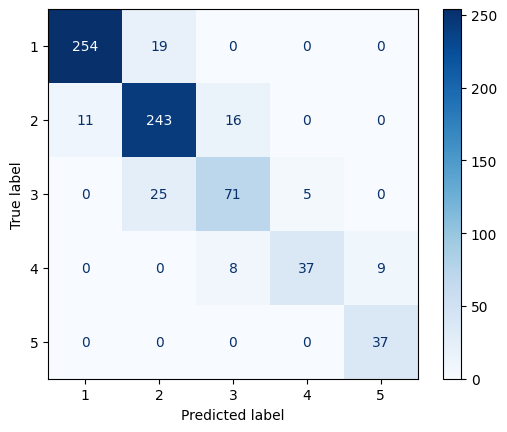

In [24]:
x = employees.drop("JobLevel", axis=1).select_dtypes(['number'])
test_accuracy(x, employees["JobLevel"])

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       274
           1       0.81      0.88      0.84       263
           2       0.82      0.68      0.74       111
           3       0.74      0.98      0.84        47
           4       1.00      0.88      0.93        40

    accuracy                           0.86       735
   macro avg       0.86      0.86      0.86       735
weighted avg       0.87      0.86      0.86       735

Cross val score: 
[0.88571429 0.86938776 0.84489796]
Roc auc score: 
0.9812308623711095


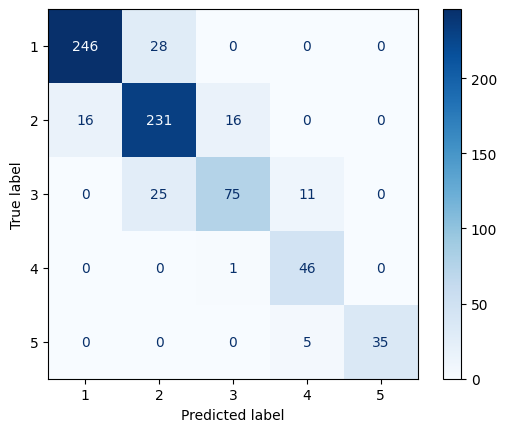

In [25]:
test_accuracy(top_two_features, employees["JobLevel"])

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       259
           1       0.84      0.88      0.86       280
           2       0.75      0.67      0.71       108
           3       0.80      0.88      0.83        49
           4       1.00      0.90      0.95        39

    accuracy                           0.86       735
   macro avg       0.86      0.85      0.85       735
weighted avg       0.86      0.86      0.86       735

Cross val score: 
[0.87755102 0.88571429 0.88163265]
Roc auc score: 
0.9797945952685614


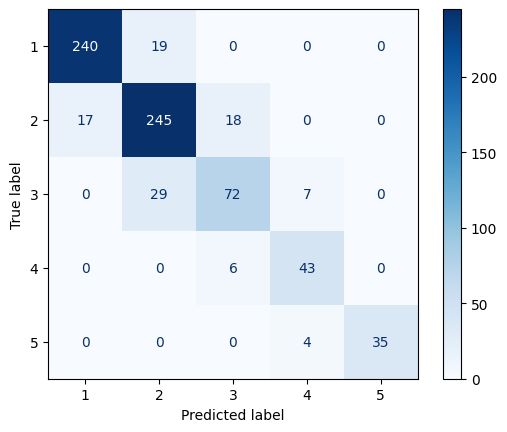

In [26]:
test_accuracy(top_five_features, employees["JobLevel"])

              precision    recall  f1-score   support

           0       0.91      0.93      0.92       263
           1       0.84      0.86      0.85       281
           2       0.70      0.70      0.70       100
           3       0.92      0.64      0.76        56
           4       0.83      1.00      0.91        35

    accuracy                           0.85       735
   macro avg       0.84      0.83      0.83       735
weighted avg       0.85      0.85      0.85       735

Cross val score: 
[0.86530612 0.85714286 0.83673469]
Roc auc score: 
0.9744277329404817


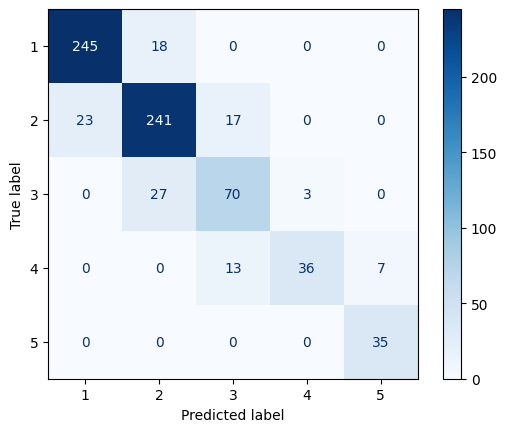

In [27]:
test_accuracy(top_ten_features, employees["JobLevel"])

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
metrics = ["Accuracy", "TP", "FP", "TN", "TP", "Sensitivity", "Specificity", "Precision", "Recall", "RoC AUC Score"]

def evaluate_classifier(X, y, classifier):
  y = LabelEncoder().fit_transform(y)
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5)

  classifier.fit(x_train, y_train)

  y_pred = classifier.predict(x_test)
  y_prob = classifier.predict_proba(x_test)
  roc_auc = roc_auc_score(y_test, y_prob, multi_class='ovr')
  
  evaluation = evaluate_results(y_test, y_pred)
  evaluation.append(roc_auc)
  return evaluation


def evaluate_results(y, y_pred): 
  accuracy = accuracy_score(y, y_pred)
  tp, fp, fn, tn = classify_results(y, y_pred)
  sensitivity = tp / (tp + fn)
  specificity = tn / (tn + fp)
  precision = tp / (tp + fp)
  recall = tp / (tp + fn)

  return [accuracy, tp, fp, tn, tp, sensitivity, specificity, precision, recall]

def classify_results(true, pred):
  matrix = confusion_matrix(true, pred)
  tp = np.average(np.diag(matrix))
  fp = np.average(matrix.sum(axis=1) - np.diag(matrix))
  fn = np.average(matrix.sum(axis=0) - np.diag(matrix))
  tn = np.average(matrix.sum() - tp - fp - fn)
  return (tp, fp, tn, fn)

In [29]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, ComplementNB, BernoulliNB, CategoricalNB

classifiers = [
    ("SVC", SVC(probability=True)),
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("Gaussian Naive Bayes", GaussianNB()),
    ("Complement Naive Bayes", ComplementNB()),
    ("Bernoulli Naive Bayes", BernoulliNB()),
    # ("Categorical Naive Bayes", CategoricalNB())
]


def evaluate(X, y, things, func):
  results = {}
  for (name, thing) in things: 
    results[name] = dict(zip(metrics, func(X, y, thing)))
  df = pd.DataFrame(results).transpose()
  return df.style.highlight_max(props='font-weight: bold', axis = 0)
# df.plot.bar(y=["Sensitivity", "Specificity", "Precision", "Recall", "RoC AUC Score"])

evaluate(top_five_features, employees["JobLevel"], classifiers, evaluate_classifier)


,Accuracy,TP,FP,TN,Sensitivity,Specificity,Precision,Recall,RoC AUC Score
SVC,0.858503,126.200000,20.800000,20.800000,0.182002,0.500000,0.858503,0.182002,0.975545
Multinomial Naive Bayes,0.506122,74.400000,72.600000,72.600000,0.126144,0.500000,0.506122,0.126144,0.741527
Gaussian Naive Bayes,0.809524,119.000000,28.000000,28.000000,0.175258,0.500000,0.809524,0.175258,0.967021
Complement Naive Bayes,0.414966,61.000000,86.000000,86.000000,0.108348,0.500000,0.414966,0.108348,0.741812
Bernoulli Naive Bayes,0.429932,63.200000,83.800000,83.800000,0.111385,0.500000,0.429932,0.111385,0.583843


In [30]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

#k = 5
#X = PCA(2).fit_transform(top_five_features)
#kmeans = KMeans(n_clusters=k, random_state=42)
#y_pred = kmeans.fit_predict(X)

In [31]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids and hasattr(clusterer, "cluster_centers_"):
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [32]:
def evaluate_clusterer(X, y, clusterer):
  y_pred = clusterer.fit_predict(X) + 1
#  display = ConfusionMatrixDisplay.from_predictions(y, y_pred, display_labels=["1", "2", "3", "4", "5"], cmap=plt.cm.Blues)
#  display.ax_.set_title(str(clusterer))

  labels = np.unique(y_pred)

  plt.figure(figsize=(8, 4))
  for label in labels:
    plt.scatter(X[np.where(y_pred == label), 0] , X[np.where(y_pred == label), 1] , label = label)

  plt.legend()
  plt.show()

  plt.figure(figsize=(8, 4))
  plot_decision_boundaries(clusterer, X)
  plt.show()
  print(clusterer)
  return evaluate_results(y, y_pred)

Target classes: 


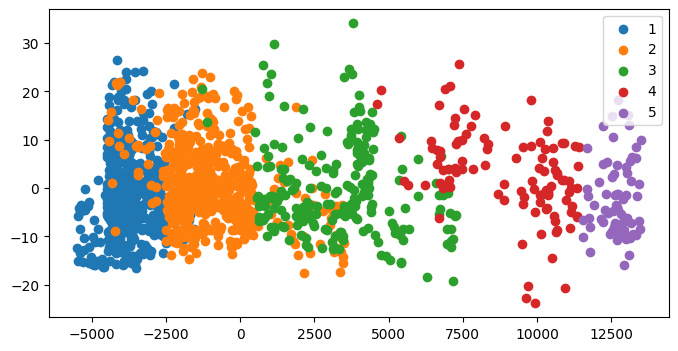

Clusterer results: 


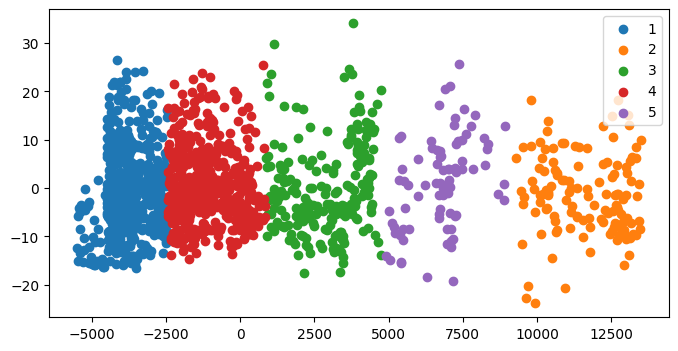

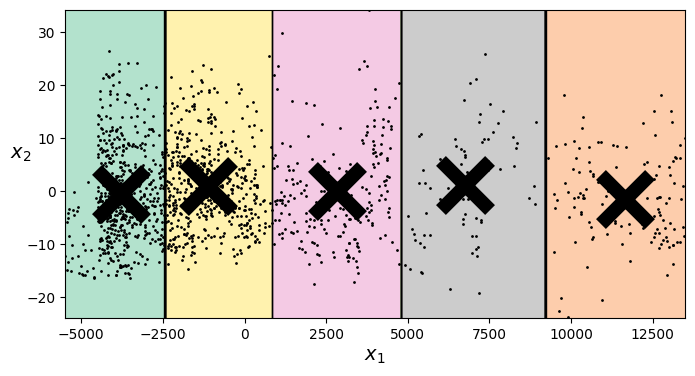

KMeans(n_clusters=5, random_state=42)


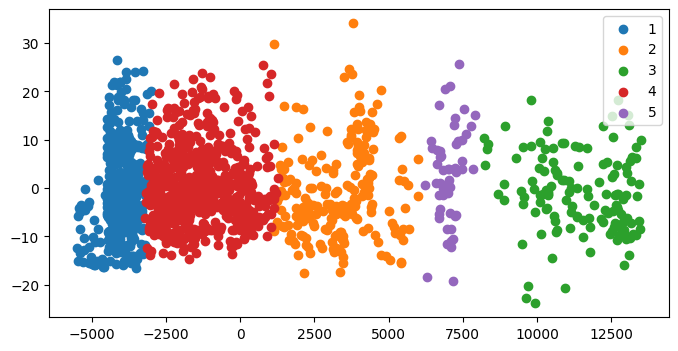

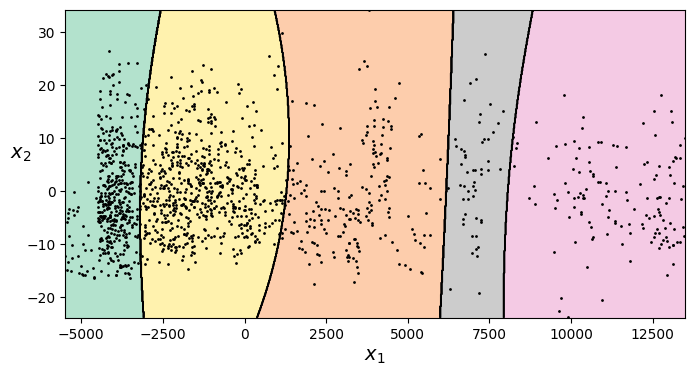

GaussianMixture(n_components=5)


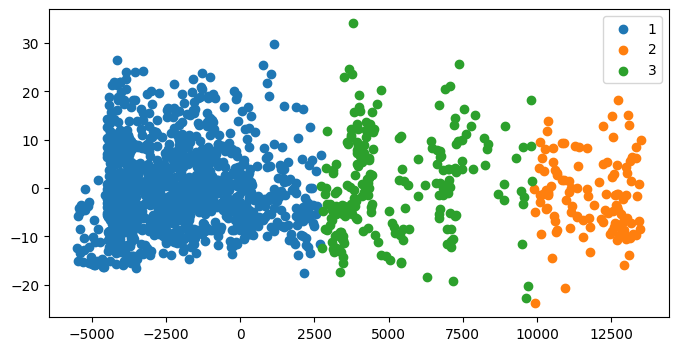

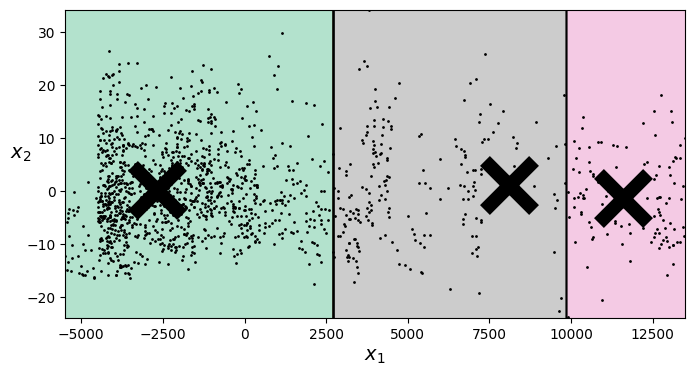

MeanShift()


,Accuracy,TP,FP,TN,Sensitivity,Specificity,Precision,Recall
KMeans,0.461224,135.600000,158.400000,158.400000,0.117586,0.500000,0.461224,0.117586
Gaussian Mixture,0.314286,92.400000,201.600000,201.600000,0.086614,0.500000,0.314286,0.086614
Mean Shift,0.461905,135.800000,158.200000,158.200000,0.117718,0.500000,0.461905,0.117718


In [33]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering, MeanShift

cluster_count = 5

clusterers = [
    ("KMeans", KMeans(cluster_count, random_state=42)),
    ("Gaussian Mixture", GaussianMixture(n_components=cluster_count)),
    ("Mean Shift", MeanShift())
]

X = PCA(2).fit_transform(top_five_features)
labels = np.unique(employees["JobLevel"])
plt.figure(figsize=(8, 4))
for label in labels:
  plt.scatter(X[np.where(employees["JobLevel"] == label), 0] , X[np.where(employees["JobLevel"] == label), 1] , label = label)

plt.legend()
print("Target classes: ")
plt.show()

print("Clusterer results: ")
evaluate(X, employees["JobLevel"], clusterers, evaluate_clusterer)

In [34]:
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
  
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

In [35]:
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 3631.4891859643894
2 : 1939.5656583348714
3 : 1338.1666927034769
4 : 875.7423957427968
5 : 726.281158455057
6 : 565.4576713511029
7 : 505.3085719106816
8 : 438.9735385317103
9 : 375.23458868545333


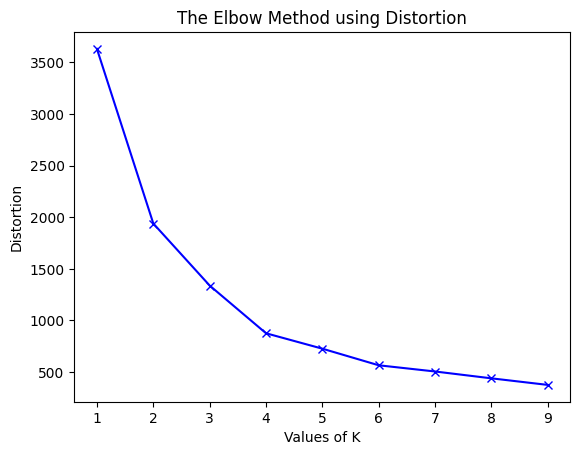

In [36]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

In [37]:
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 32560389719.713516
2 : 8255723011.489364
3 : 3615621312.4624147
4 : 1804130624.3437977
5 : 1153342750.0642595
6 : 744977777.133035
7 : 573780420.8924751
8 : 422139586.40182316
9 : 324699181.0041613


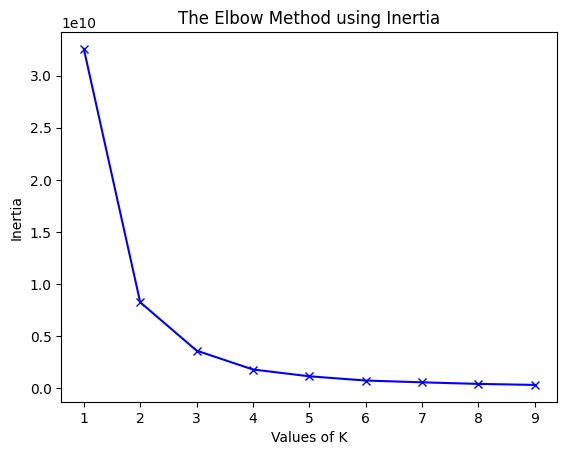

In [38]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

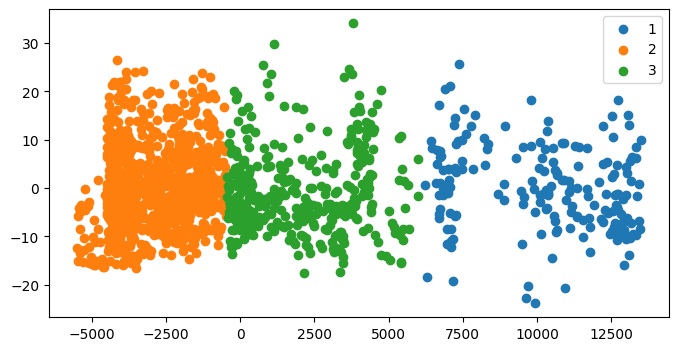

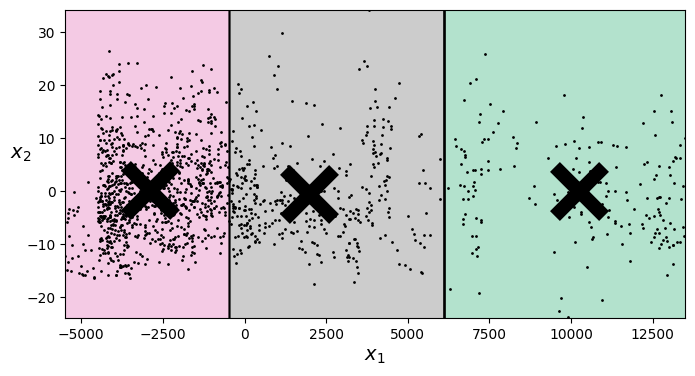

KMeans(n_clusters=3, random_state=42)


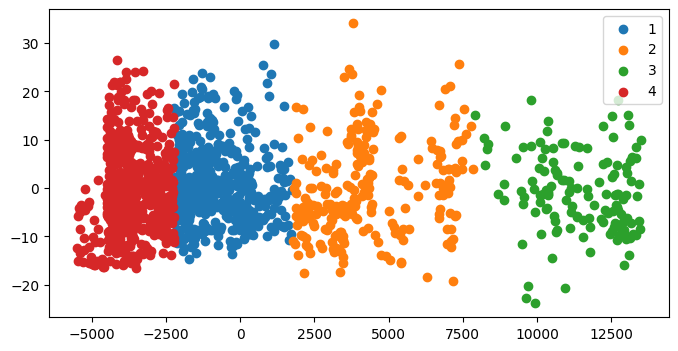

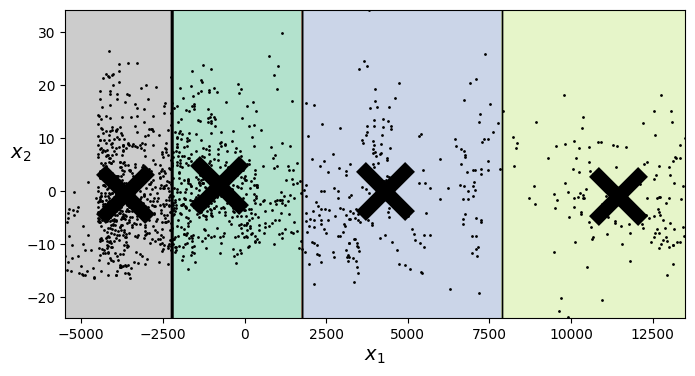

KMeans(n_clusters=4, random_state=42)


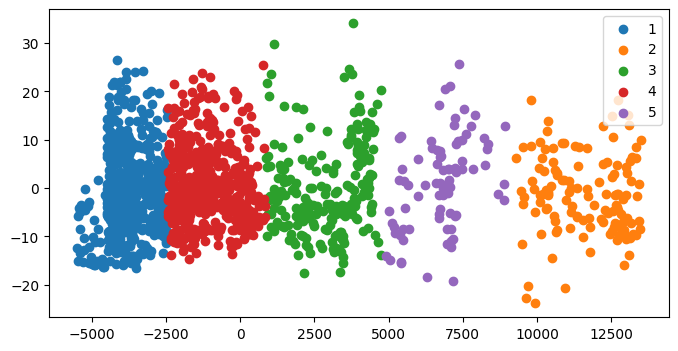

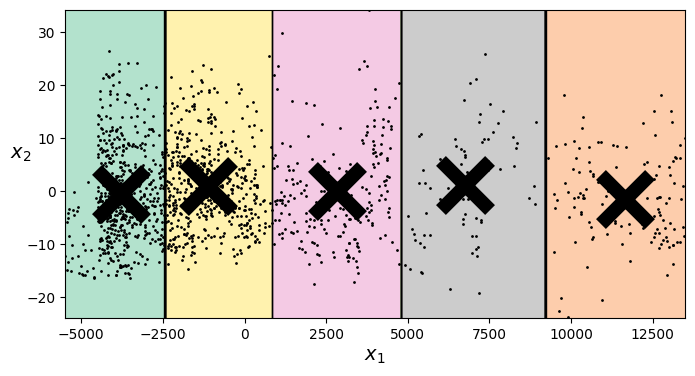

KMeans(n_clusters=5, random_state=42)


,Accuracy,FP,Precision,Recall,Sensitivity,Specificity,TN,TP
KMeans,0.461224,158.400000,0.461224,0.117586,0.117586,0.500000,158.400000,135.600000


In [39]:
KMeansClusterers = [
    ("KMeans", KMeans(3, random_state=42)),
    ("KMeans", KMeans(4, random_state=42)),
    ("KMeans", KMeans(5, random_state=42))
]
evaluate(X, employees["JobLevel"], KMeansClusterers, evaluate_clusterer)

For n_clusters = 2 The average silhouette_score is : 0.7079683191335938
For n_clusters = 3 The average silhouette_score is : 0.6234634976105036
For n_clusters = 4 The average silhouette_score is : 0.6089751401780813
For n_clusters = 5 The average silhouette_score is : 0.6156073760170296
For n_clusters = 6 The average silhouette_score is : 0.6171922387803804


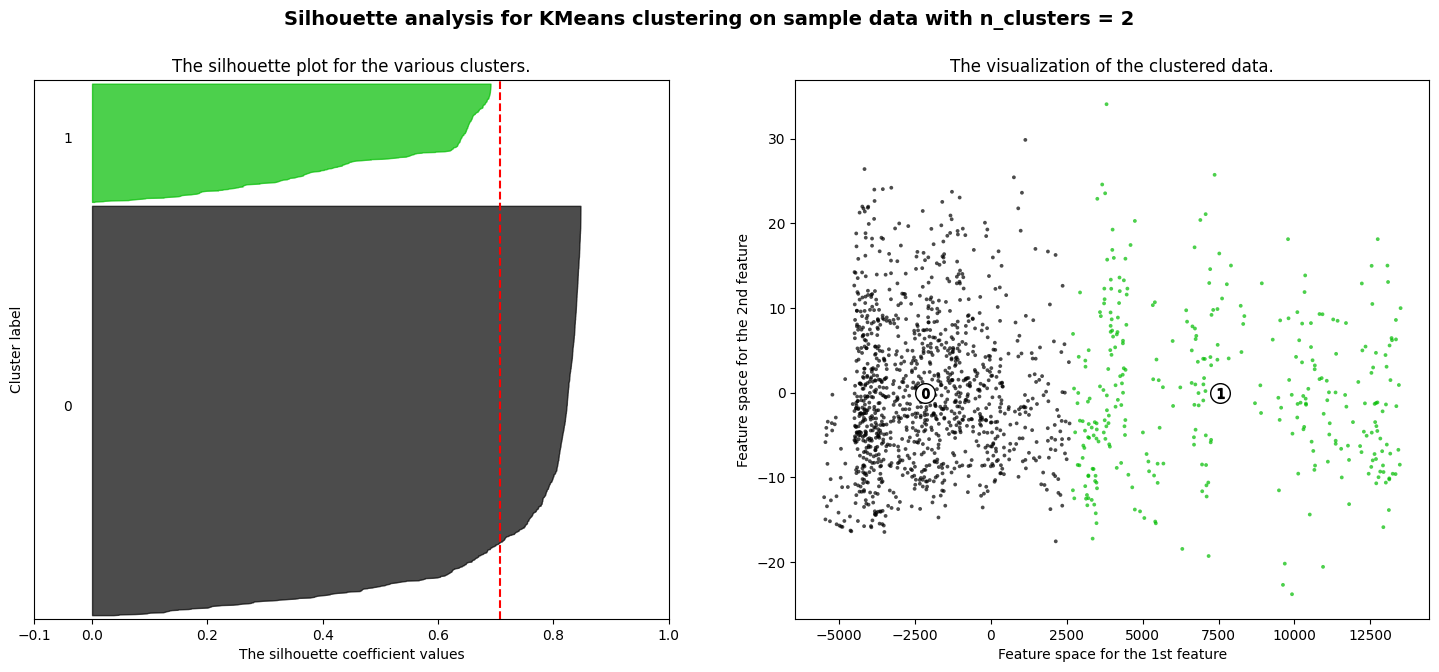

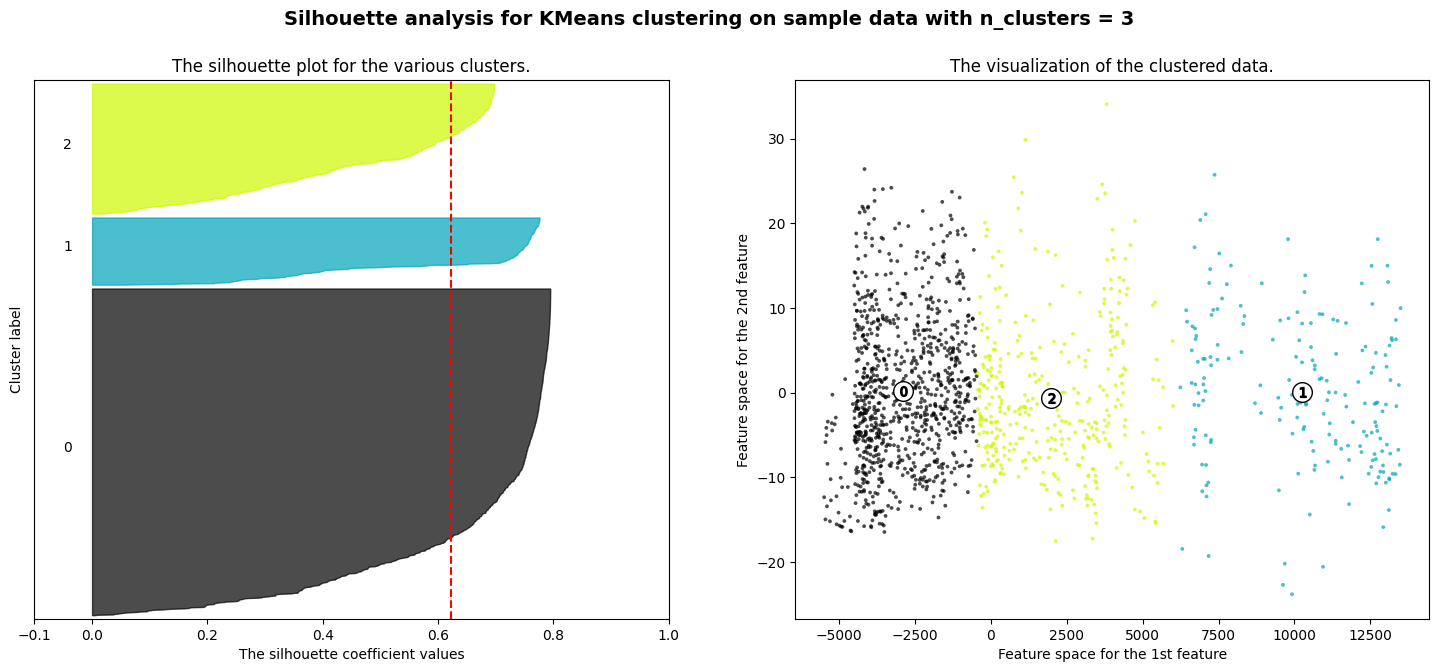

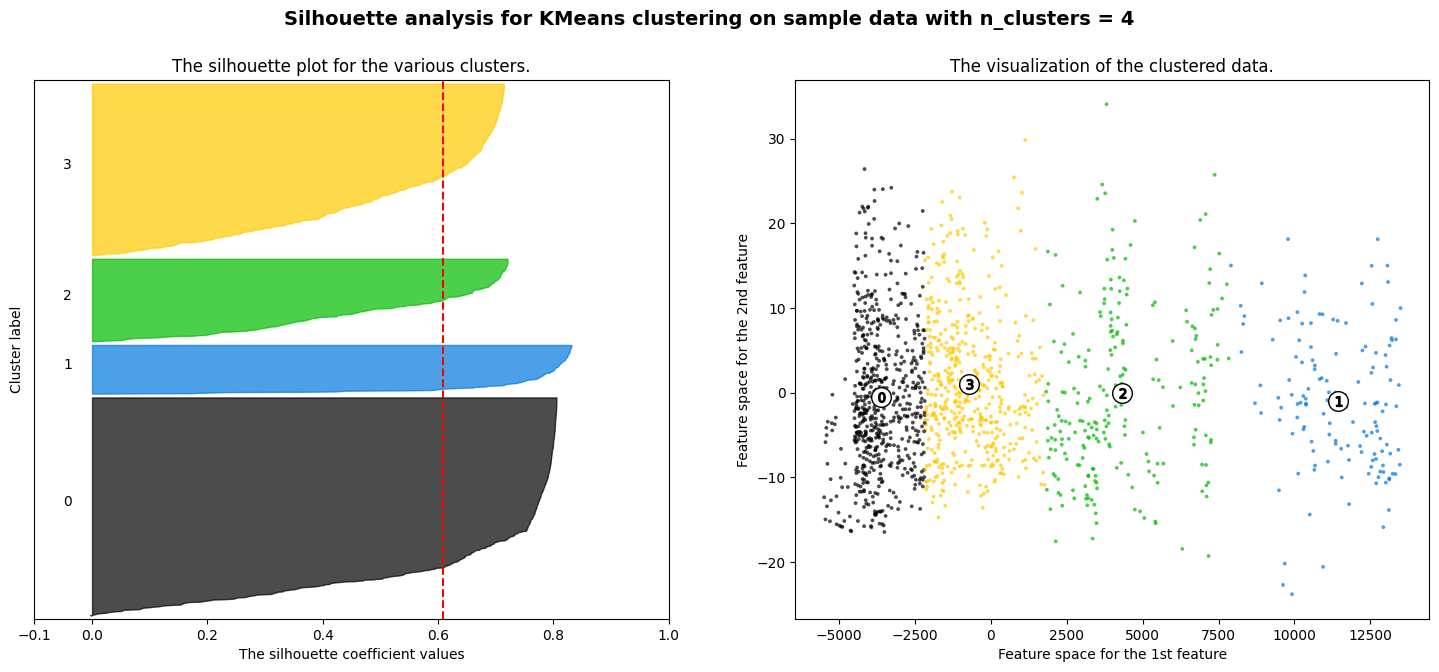

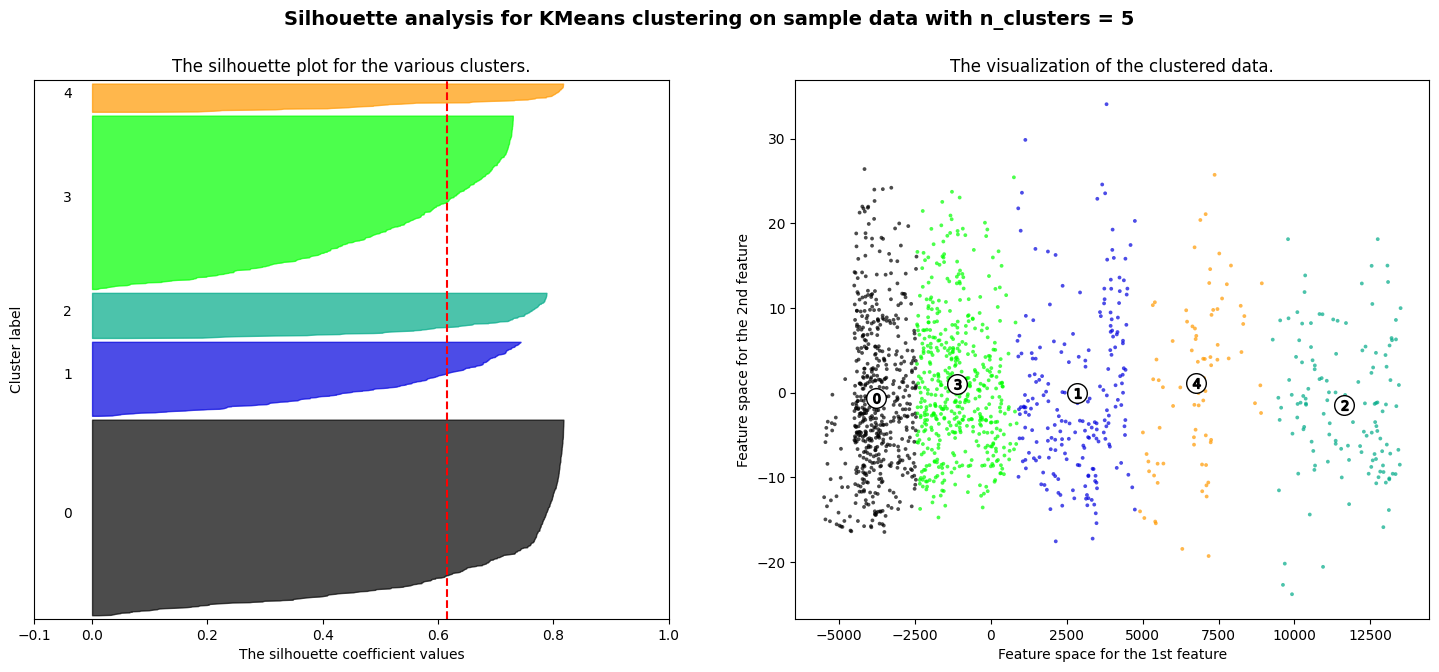

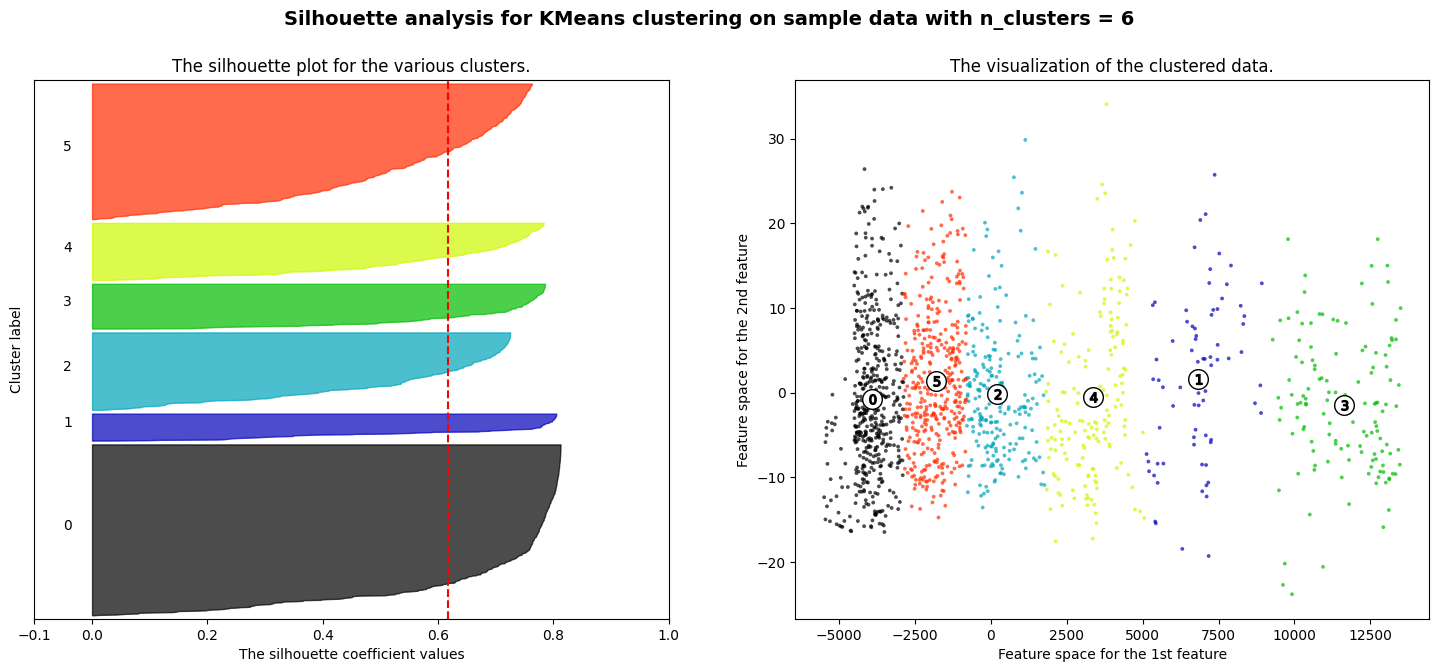

In [40]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [41]:
employees.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [42]:
employees['WorkLifeBalance']=employees['WorkLifeBalance'].astype('category')
employees['YearsAtCompany']=employees['YearsAtCompany'].astype('category')

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    employees['WorkLifeBalance'], employees['YearsAtCompany'], random_state=0, test_size=0.6)
# print(y_train)
# y_train = y_train.iloc[:,1]
# y_test = y_test.iloc[:,1]
# test_size=0.3 then 0.6 for other trees
X_train = X_train.values.reshape(-1,1)
X_test = X_test.values.reshape(-1,1)

[Text(0.5, 0.8333333333333334, 'X[0] <= 2.222\ngini = 0.922\nsamples = 588\nvalue = [19, 62, 47, 47, 42, 91, 28, 36, 38, 45, 49, 7\n5, 9, 8, 5, 2, 4, 2, 6, 9, 7, 6, 1, 3, 1\n1, 1, 2, 1, 2, 1, 1]'),
 Text(0.25, 0.5, 'X[0] <= 1.257\ngini = 0.913\nsamples = 160\nvalue = [4, 18, 13, 8, 14, 29, 14, 7, 5, 12, 13, 3, 1\n3, 2, 1, 0, 1, 1, 1, 2, 1, 2, 1, 1, 0, 1\n0, 0, 0, 0, 1, 1]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.882\nsamples = 33\nvalue = [0, 4, 0, 3, 2, 8, 2, 2, 1, 3, 3, 2, 0, 2\n0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.914\nsamples = 127\nvalue = [4, 14, 13, 5, 12, 21, 12, 5, 4, 9, 10, 1, 1\n1, 2, 1, 0, 0, 1, 1, 2, 1, 2, 1, 1, 0, 1\n0, 0, 0, 0, 1, 1]'),
 Text(0.75, 0.5, 'X[0] <= 3.763\ngini = 0.922\nsamples = 428\nvalue = [15, 44, 34, 39, 28, 62, 14, 29, 33, 33, 36, 4\n4, 6, 6, 4, 2, 3, 1, 5, 7, 6, 4, 0, 2, 1\n0, 1, 2, 1, 2, 0, 0]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.923\nsamples = 364\nvalue = [12, 37, 30

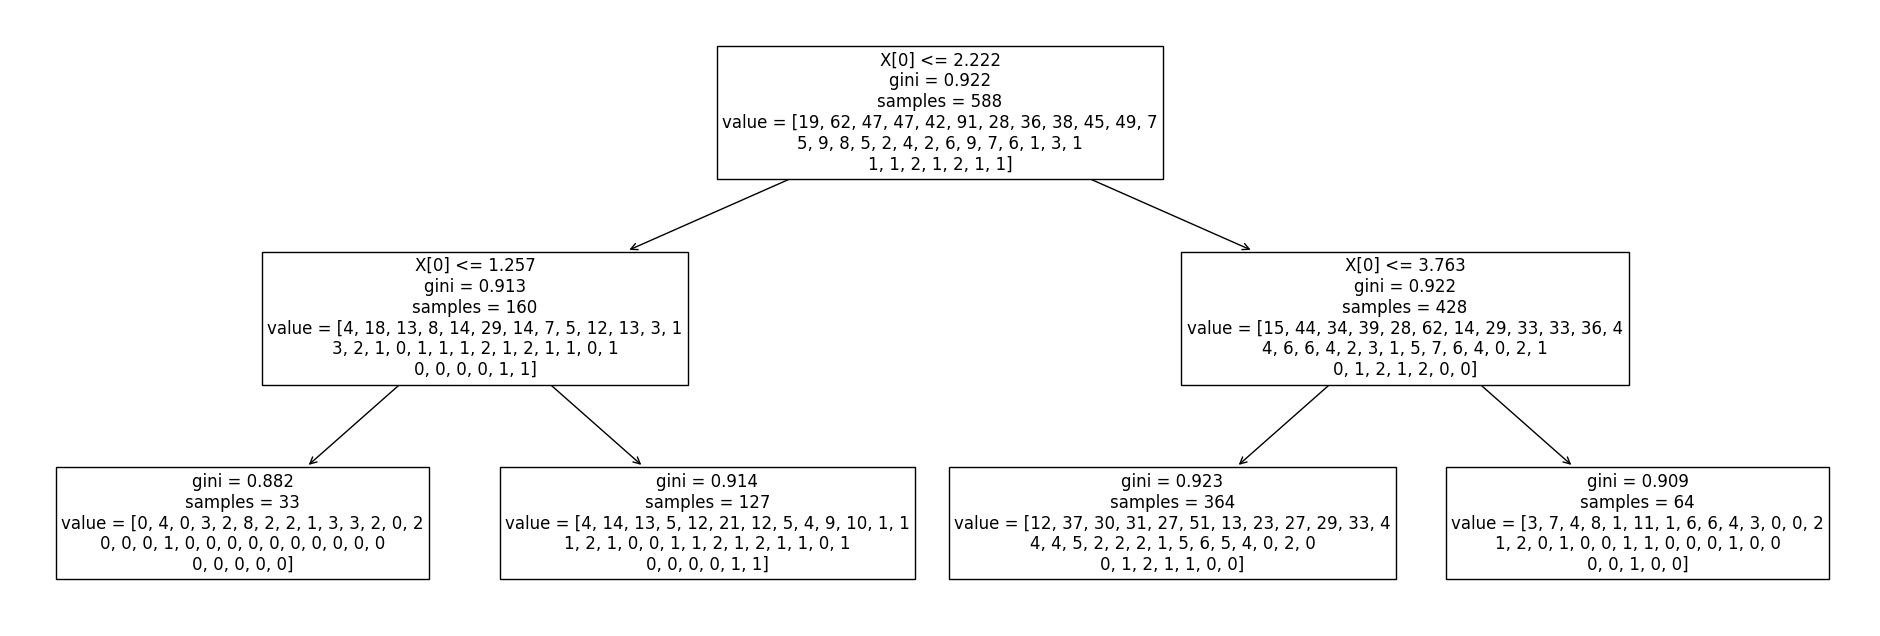

In [44]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=2, splitter = 'random')
tree_clf.fit(X_train, y_train)
plt.figure(figsize=(24,8))
plot_tree(tree_clf, fontsize=12)

In [45]:
from sklearn.model_selection import cross_val_predict
from numpy import mean
y_pred = tree_clf.score(X_test, y_test)
scores = cross_val_score(tree_clf, X_train, y_train, scoring='accuracy', cv=10, n_jobs=-1)
print(y_pred)
print(mean(scores))

trees = [
    ('Tree 1' , DecisionTreeClassifier(criterion='gini', max_depth=2, splitter = 'best').fit(X_train, y_train)),  
    ('Tree 2' , DecisionTreeClassifier(criterion='entropy', max_depth=3, splitter = 'random').fit(X_train, y_train)),
    ('Tree 3' , DecisionTreeClassifier(criterion='log_loss', max_depth=4, splitter = 'best').fit(X_train, y_train))
]

results = {}
for (name, tree) in trees:
    results[name] = dict(zip(metrics, evaluate_results(y_test, tree.predict(X_test))))
df = pd.DataFrame(results).transpose()
df.style.highlight_max(props='font-weight: bold', axis = 0)


c:\Users\Mikyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


0.11904761904761904
0.14967855055523085


,Accuracy,TP,FP,TN,Sensitivity,Specificity,Precision,Recall
Tree 1,0.119048,3.088235,22.852941,22.852941,0.003693,0.500000,0.119048,0.003693
Tree 2,0.119048,3.088235,22.852941,22.852941,0.003693,0.500000,0.119048,0.003693
Tree 3,0.119048,3.088235,22.852941,22.852941,0.003693,0.500000,0.119048,0.003693


In [46]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [2, 3, 5, 10],  
              'splitter':['best', 'random'],
              'criterion' : ["gini", "entropy", "log_loss"]} 

grid = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 10, refit = True, verbose = 3,n_jobs=-1)
grid.fit(X_train, y_train) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_predictions = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_predictions)) 

Fitting 10 folds for each of 24 candidates, totalling 240 fits


c:\Users\Mikyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


{'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.00      0.00      0.00       109
           2       0.00      0.00      0.00        80
           3       0.00      0.00      0.00        81
           4       0.00      0.00      0.00        68
           5       0.12      1.00      0.21       105
           6       0.00      0.00      0.00        48
           7       0.00      0.00      0.00        54
           8       0.00      0.00      0.00        42
           9       0.00      0.00      0.00        37
          10       0.00      0.00      0.00        71
          11       0.00      0.00      0.00        25
          12       0.00      0.00      0.00         9
          13       0.00      0.00      0.00        15
          14       0.00      0.00      0.00        10
          15       0.00      0.00      0.00        15
          16       0.00

c:\Users\Mikyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Mikyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

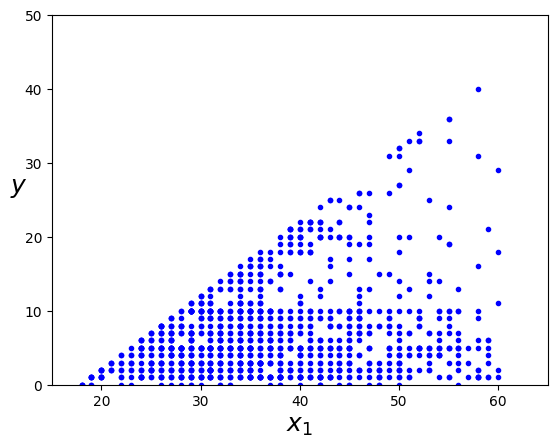

In [47]:
employees['Age']=employees['Age'].astype('category')
employees['YearsAtCompany']=employees['YearsAtCompany'].astype('category')
X_train, X_test, y_train, y_test = train_test_split(
    employees['Age'], employees['YearsAtCompany'], random_state=0, test_size=0.8)

plt.plot(X_test, y_test, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([15, 65, 0, 50])
plt.show()

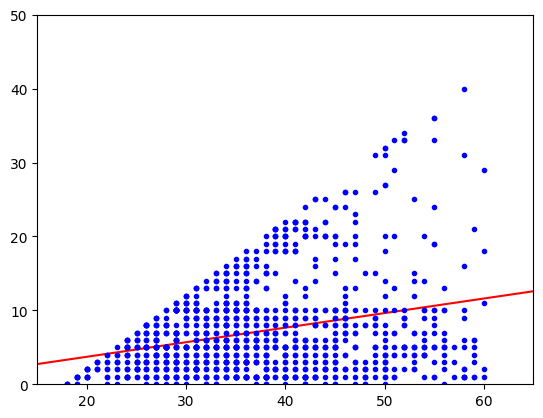

In [48]:
X_b = np.c_[np.ones((len(X_test), 1)), X_test]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y_test)
X_new = np.array([[15], [65]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, "r-")
plt.plot(X_test, y_test, "b.")
plt.axis([15, 65, 0, 50])
plt.show()

In [51]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
X = X_test.values.reshape(-1,1)
Y = y_test.values.reshape(-1,1)
lin_reg.fit(X, Y)
print(lin_reg.intercept_, lin_reg.coef_)
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
print(lin_reg.predict(X_new))
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y_test, rcond=1e-6)
print(theta_best_svd)

[-0.21642497] [[0.19695296]]
[[-0.21642497]
 [ 0.17748094]]
[-0.21642497  0.19695296]


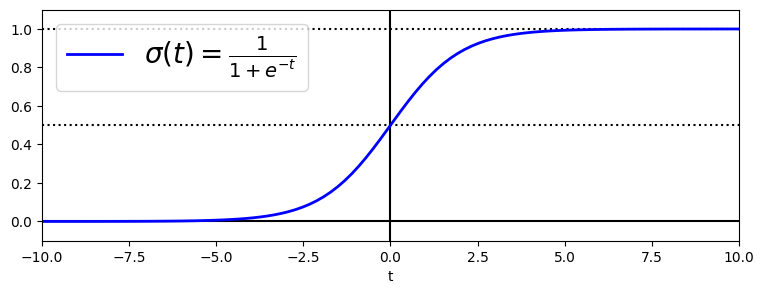

In [52]:
t = np.linspace(-10, 10, 100)
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])
plt.show()

In [55]:
from sklearn.linear_model import LogisticRegression

x = employees["JobSatisfaction"].values.reshape(-1,1)
y = employees["Attrition"].values.reshape(-1,1)

log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(x, y)

c:\Users\Mikyb\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

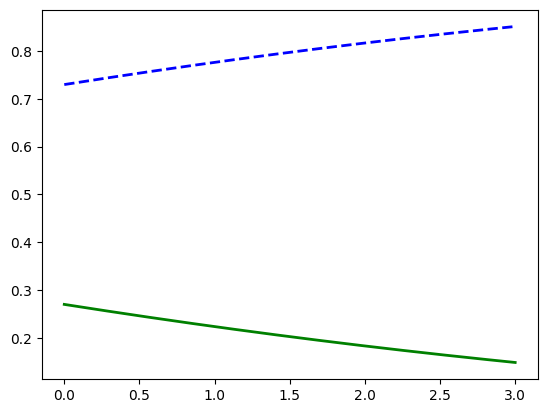

In [57]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

In [58]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
decision_boundary

In [ ]:
log_reg.predict([[1.7], [1.5]])

In [ ]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

In [ ]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

In [ ]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()